1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [638]:
import numpy as np
a = np.random.random((10, 3))
print(a)
for i in range(10):
    print(a[i, np.argmin(np.abs(a[i] - 0.5))])

[[0.9143716  0.69763882 0.2906507 ]
 [0.45104703 0.96693709 0.36704422]
 [0.45593928 0.98640748 0.59771048]
 [0.79269644 0.21653237 0.95368769]
 [0.83556861 0.92262112 0.98384851]
 [0.8441061  0.15685487 0.12452393]
 [0.11759702 0.75171742 0.2502314 ]
 [0.68997786 0.51984896 0.32598893]
 [0.18033489 0.95857947 0.03068764]
 [0.15753139 0.37975508 0.53504586]]
0.6976388239498544
0.4510470283642447
0.45593928350571944
0.21653236545408794
0.8355686106812246
0.1568548748145333
0.2502314004436249
0.5198489622184308
0.18033488921143903
0.5350458565136632


2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [639]:
b = np.random.random((6,6))
print(b)
for i in range(6):
    print(np.sum(b[i])/np.min(b.transpose()[i]))

[[0.73132154 0.4249348  0.33686493 0.74943695 0.02369991 0.82214949]
 [0.23312435 0.35939661 0.23161124 0.50518833 0.33492649 0.2928441 ]
 [0.58960642 0.3055859  0.08350223 0.74324158 0.61343506 0.65012995]
 [0.36139797 0.52503758 0.32922223 0.42159557 0.50652536 0.27993929]
 [0.4340403  0.68525918 0.92441138 0.30003095 0.36173635 0.00879888]
 [0.28465189 0.6481718  0.16979927 0.51276355 0.61967738 0.0341407 ]]
13.247897833292543
6.404389476257965
35.75355073090723
8.078226409294546
114.52687470202356
257.89707240377766


3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [640]:
d = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
e = np.max(d[np.roll(d == 0, 1) & (np.arange(len(d)) > 0)])
print(e)

5


4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [641]:
f = np.ones(10)
g = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for i in range(g.size):
    f[g[i]] = f[g[i]] + 1
print(f)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [642]:
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance

In [643]:
from sklearn.metrics import pairwise_distances_argmin
def kmeans(data, k, itera=100, eps=1e-05):
    rand = np.random.RandomState(0)
    r = rand.permutation(data.shape[0])[:k]
    centroids = data[r]
    while itera > 0:
        clusters = pairwise_distances_argmin(data, centroids)
        newcentroids = np.array([data[clusters == r].mean(0) for r in range(k)])
        distoration = distance.cdist(data/100, centroids/100, 'sqeuclidean').min(axis = 1).sum()/k
        if np.max(centroids - newcentroids) < eps:
            break
        centroids = newcentroids
        itera = itera - 1
    return clusters, distoration

In [644]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
distlist = np.empty(10)

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

### Age - Annual Income

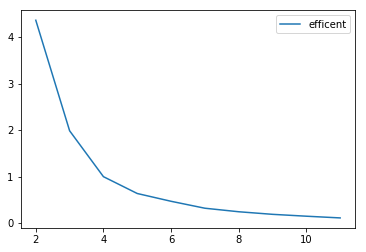

In [645]:
X = np.array([data[:, 2], data[:, 3]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

"Локоть" на k = 4

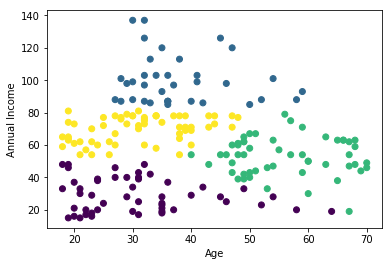

In [646]:
colors, efficent = kmeans(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

### Age - Spending Score

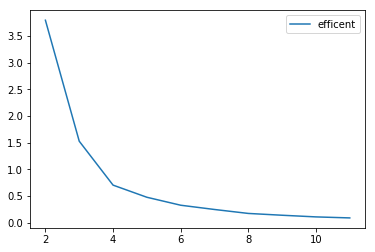

In [647]:
X = np.array([data[:, 2], data[:, 4]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

"Локоть" на k = 4

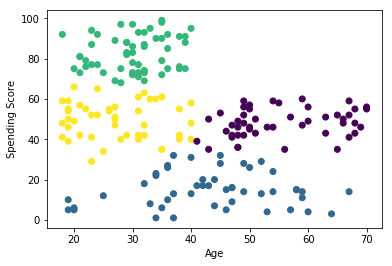

In [648]:
colors, efficent = kmeans(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

### Annual Income - Spending Score

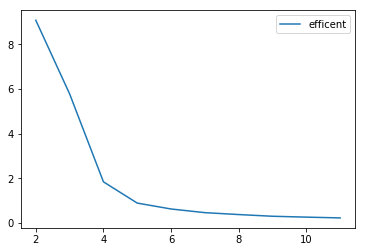

In [649]:
X = np.array([data[:, 3], data[:, 4]])
X = X.transpose()
for i in range(2,12):
    colors, efficent = kmeans(X, i)
    distlist[i-2] = efficent
plt.plot(range(2,12), distlist, label = 'efficent')
plt.legend()
plt.grid(False)

"Локоть" на k = 4

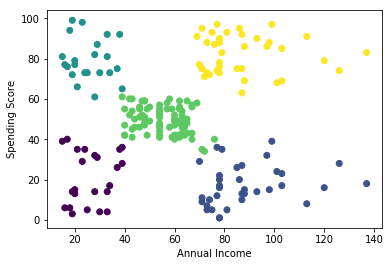

In [650]:
colors, distoration = kmeans(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=colors);
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()